In [ ]:
! unzip /content/drive/MyDrive/proect-work/mosquito.zip -d /content/drive/MyDrive/proect-work #unzipping data

Archive:  /content/drive/MyDrive/proect-work/mosquito.zip
  inflating: /content/drive/MyDrive/proect-work/aegypti/aegypti/aegypti_0/aegypti100a.jpg  
  inflating: /content/drive/MyDrive/proect-work/aegypti/aegypti/aegypti_0/aegypti100b.jpg  
  inflating: /content/drive/MyDrive/proect-work/aegypti/aegypti/aegypti_0/aegypti100c.jpg  
  inflating: /content/drive/MyDrive/proect-work/aegypti/aegypti/aegypti_0/aegypti101b.jpg  
  inflating: /content/drive/MyDrive/proect-work/aegypti/aegypti/aegypti_0/aegypti101c.jpg  
  inflating: /content/drive/MyDrive/proect-work/aegypti/aegypti/aegypti_0/aegypti101d.jpg  
  inflating: /content/drive/MyDrive/proect-work/aegypti/aegypti/aegypti_0/aegypti102a.jpg  
  inflating: /content/drive/MyDrive/proect-work/aegypti/aegypti/aegypti_0/aegypti102b.jpg  
  inflating: /content/drive/MyDrive/proect-work/aegypti/aegypti/aegypti_0/aegypti102c.jpg  
  inflating: /content/drive/MyDrive/proect-work/aegypti/aegypti/aegypti_0/aegypti102d.jpg  
  inflating: /content/

In [ ]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 782.8/782.8 kB 6.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
import os

In [ ]:
os.listdir('/content/aegypti')

['aegypti']

In [ ]:
import keras
image_size = (180, 180)
batch_size = 128

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/proect-work/aegypti/aegypti",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 2403 files belonging to 8 classes.
Using 1923 files for training.
Using 480 files for validation.


In [ ]:
#  image_size = (180, 180)
# batch_size = 128

# train_ds, val_ds = keras.utils.image_dataset_from_directory(
#     "/content/drive/MyDrive/proect-work/albopictus/albopictus",
#     validation_split=0.2,
#     subset="both",
#     seed=1337,
#     image_size=image_size,
#     batch_size=batch_size,
# )

Found 2400 files belonging to 8 classes.
Using 1920 files for training.
Using 480 files for validation.


In [ ]:
!pip install ultralytics

In [35]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
#from keras.layers.core import Flatten, Dense, Dropout
#from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
#from keras.optimizers import SGD
#import cv2,


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

IMAGE_SIZE =[224,224]

In [36]:
from PIL import Image
import os
from IPython.display import display
from IPython.display import Image as _Imgdis

#create a object



In [37]:
#def VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000, classifier_activation='softmax')


vgg = VGG16(input_shape= IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [38]:
for layer in vgg.layers:
  layer.trainable = False

In [59]:
train_path = '/content/drive/MyDrive/project-work/train'
test_path = '/content/drive/MyDrive/project-work/test'

In [50]:
# library glob used when you want to see how many folders are in the particular directory
import os
folders =os.listdir(train_path)

#glob(train_path)
print(len(folders))

2


In [60]:
folders =os.listdir(test_path)

print(len(folders))

2


In [52]:
x = Flatten()(vgg.output)  # Flatten means taking into account outputs coming from the previous layer and constructing
prediction = Dense(len(folders),activation='softmax')(x)   #dense you specify the number of classes( the folders)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary() # gives a picture of your entire model

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [53]:
from keras import optimizers
adm =optimizers.Adam()
model.compile(
  loss='binary_crossentropy',
  optimizer=adm,
  metrics=['accuracy']
)

In [54]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [55]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [56]:
train_set = train_datagen.flow_from_directory( train_path,

    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 1023 images belonging to 2 classes.


In [61]:
test_set = test_datagen.flow_from_directory(
   test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 180 images belonging to 2 classes.


In [63]:
# train model
from datetime import datetime
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath = 'mymodel.h5',  verbose=2,
                             save_best_only=True,)
callbacks = [checkpoint]

start = datetime.now()   # fn to keep how much time the training process took.

model_history = model.fit_generator(
    train_set,
    validation_data=test_set,
    epochs=20,
    steps_per_epoch=5,
    validation_steps=32,
    callbacks=callbacks, verbose=2)

duration = datetime.now()-start
print('Training compeleted in time:', duration)

<ipython-input-63-49fd9abf4b0d>:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = model.fit_generator(


Epoch 1/20



Epoch 1: val_loss improved from inf to 1.06268, saving model to mymodel.h5
5/5 - 296s - loss: 1.3750 - accuracy: 0.8562 - val_loss: 1.0627 - val_accuracy: 0.8722 - 296s/epoch - 59s/step
Epoch 2/20


5/5 - 133s - loss: 1.3273 - accuracy: 0.8302 - 133s/epoch - 27s/step
Epoch 3/20


5/5 - 132s - loss: 1.2524 - accuracy: 0.8438 - 132s/epoch - 26s/step
Epoch 4/20


5/5 - 140s - loss: 0.8724 - accuracy: 0.8805 - 140s/epoch - 28s/step
Epoch 5/20


5/5 - 133s - loss: 1.6166 - accuracy: 0.8500 - 133s/epoch - 27s/step
Epoch 6/20


5/5 - 133s - loss: 1.0799 - accuracy: 0.8813 - 133s/epoch - 27s/step
Epoch 7/20


5/5 - 138s - loss: 1.5848 - accuracy: 0.8500 - 138s/epoch - 28s/step
Epoch 8/20


5/5 - 129s - loss: 1.5272 - accuracy: 0.8742 - 129s/epoch - 26s/step
Epoch 9/20


5/5 - 143s - loss: 1.5342 - accuracy: 0.8625 - 143s/epoch - 29s/step
Epoch 10/20


5/5 - 130s - loss: 1.3564 - accuracy: 0.8750 - 130s/epoch - 26s/step
Epoch 11/20


5/5 - 133s - loss: 0.7152 - accuracy: 0.9062 - 133s/epoch - 27s/step
Epoch 12/20


5/5 - 130s - loss: 0.6462 - accuracy: 0.9187 - 130s/epoch - 26s/step
Epoch 13/20


5/5 - 142s - loss: 1.1478 - accuracy: 0.8931 - 142s/epoch - 28s/step
Epoch 14/20


5/5 - 133s - loss: 1.0038 - accuracy: 0.9062 - 133s/epoch - 27s/step
Epoch 15/20


5/5 - 131s - loss: 0.9932 - accuracy: 0.9250 - 131s/epoch - 26s/step
Epoch 16/20


5/5 - 133s - loss: 1.1536 - accuracy: 0.8813 - 133s/epoch - 27s/step
Epoch 17/20


5/5 - 139s - loss: 0.9735 - accuracy: 0.9000 - 139s/epoch - 28s/step
Epoch 18/20


5/5 - 138s - loss: 0.7026 - accuracy: 0.9250 - 138s/epoch - 28s/step
Epoch 19/20


5/5 - 136s - loss: 0.3852 - accuracy: 0.9500 - 136s/epoch - 27s/step
Epoch 20/20


5/5 - 134s - loss: 0.8354 - accuracy: 0.8938 - 134s/epoch - 27s/step
Training compeleted in time: 0:51:05.284941


Text(0, 0.5, 'Accuracy')

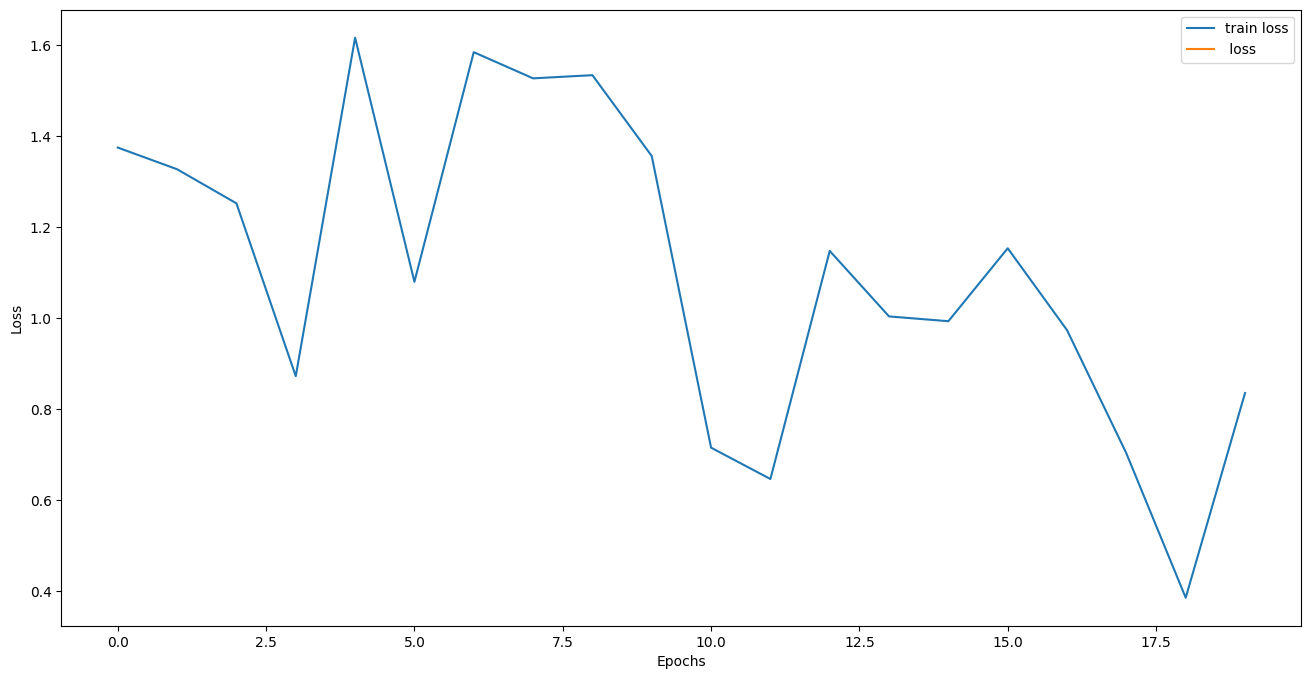

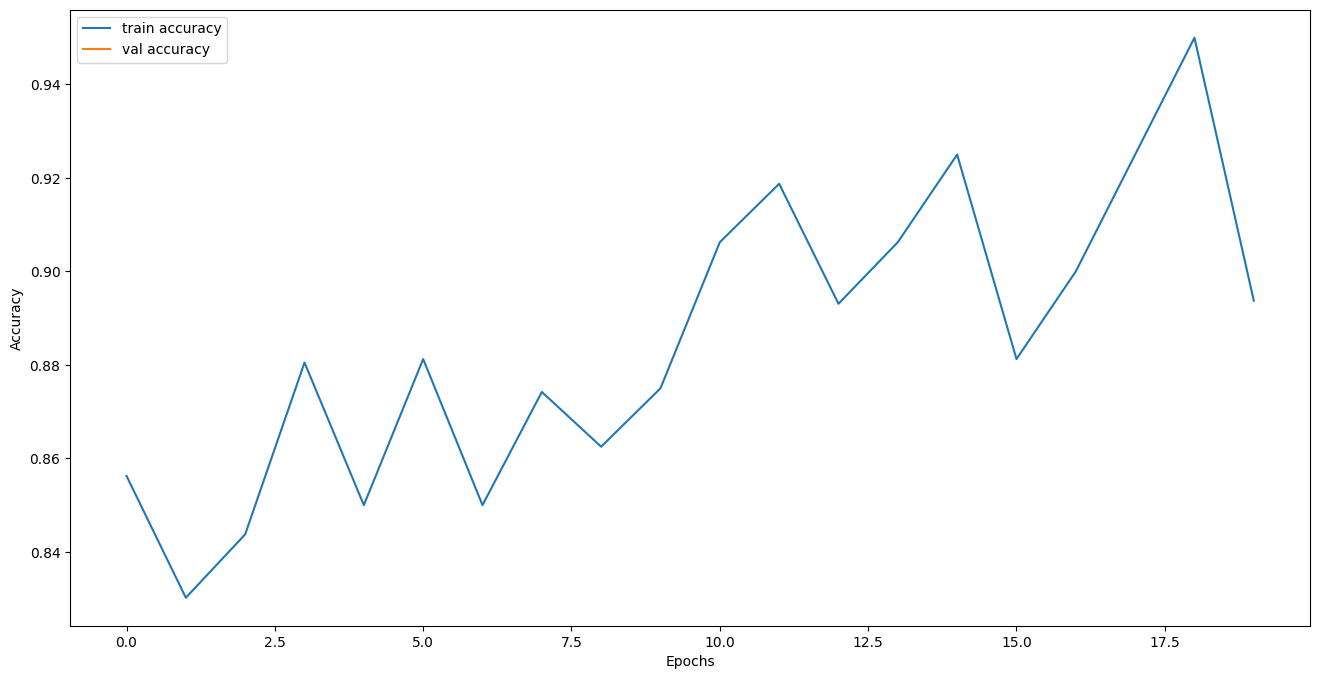

In [72]:
plt.figure(figsize = (16, 8))

# Plotting the Training and Validation Loss
plt.plot(model_history.history['loss'],label='train loss')
plt.plot(model_history.history['val_loss'],label=' loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Plotting the Training and Validation Accuracy
plt.figure(figsize = (16, 8))
plt.plot(model_history.history['accuracy'],label='train accuracy')
plt.plot(model_history.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")